<a href="https://colab.research.google.com/github/yudhiesh1997/RedWineQuality/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import seaborn as sns 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense 
from keras import metrics
import matplotlib as mpl

In [117]:
df = pd.read_csv("/content/drive/My Drive/winequality-red 3.csv")

columns_ = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']
features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

In [118]:
df = df[columns_]

In [119]:
df.head()

,alcohol,volatile acidity,sulphates,citric acid,quality
0,9.4,0.70,0.56,0.00,5
1,9.8,0.88,0.68,0.00,5
2,9.8,0.76,0.65,0.04,5
3,9.8,0.28,0.58,0.56,6
4,9.4,0.70,0.56,0.00,5


In [120]:
one_hot = pd.get_dummies(df.quality)

In [121]:
df = pd.concat([df, one_hot], axis=1)

In [122]:
df.head()

,alcohol,volatile acidity,sulphates,citric acid,quality,3,4,5,6,7,8
0,9.4,0.70,0.56,0.00,5,0,0,1,0,0,0
1,9.8,0.88,0.68,0.00,5,0,0,1,0,0,0
2,9.8,0.76,0.65,0.04,5,0,0,1,0,0,0
3,9.8,0.28,0.58,0.56,6,0,0,0,1,0,0
4,9.4,0.70,0.56,0.00,5,0,0,1,0,0,0


In [123]:
scaler = StandardScaler()

def scale_features(features, df):
  df[features] = scaler.fit_transform(df[features])

In [124]:
scale_features(features=features, df=df)

In [125]:
df.head()

,alcohol,volatile acidity,sulphates,citric acid,quality,3,4,5,6,7,8
0,-0.960246,0.961877,-0.579207,-1.391472,5,0,0,1,0,0,0
1,-0.584777,1.967442,0.128950,-1.391472,5,0,0,1,0,0,0
2,-0.584777,1.297065,-0.048089,-1.186070,5,0,0,1,0,0,0
3,-0.584777,-1.384443,-0.461180,1.484154,6,0,0,0,1,0,0
4,-0.960246,0.961877,-0.579207,-1.391472,5,0,0,1,0,0,0


In [129]:
df.iloc[:, 0:4]

,alcohol,volatile acidity,sulphates,citric acid
0,-0.960246,0.961877,-0.579207,-1.391472
1,-0.584777,1.967442,0.128950,-1.391472
2,-0.584777,1.297065,-0.048089,-1.186070
3,-0.584777,-1.384443,-0.461180,1.484154
4,-0.960246,0.961877,-0.579207,-1.391472
...,...,...,...,...
1594,0.072294,0.403229,-0.461180,-0.980669
1595,0.729364,0.123905,0.601055,-0.877968
1596,0.541630,-0.099554,0.542042,-0.723916
1597,-0.209308,0.654620,0.305990,-0.775267


In [106]:
# Stratified K-fold cross-validation 
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)
y = np.ravel(df.quality)
kf = StratifiedKFold(n_splits=5)

for f, (t_,v_) in enumerate(kf.split(X=df, y=y)):
  df.loc[v_, 'kfold'] = f
  df_train = df.loc[t_]
  df_test = df.loc[v_]

In [149]:
X = df.iloc[:, 0:4].values
Y = df.iloc[:, 5:].values

In [150]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1279, 4) (1279, 6) (320, 4) (320, 6)


In [182]:
METRICS = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
]

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)])

In [183]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=METRICS)

In [184]:
history = model.fit(X_train, Y_train,validation_split=0.1, epochs=200)

Epoch 1/200
36/36 [==============================] - 1s 26ms/step - loss: 1.3550 - tp: 137.0000 - fp: 111.0000 - tn: 5644.0000 - fn: 1014.0000 - accuracy: 0.8371 - precision: 0.5524 - recall: 0.1190 - auc: 0.8429 - val_loss: 0.9995 - val_tp: 54.0000 - val_fp: 22.0000 - val_tn: 618.0000 - val_fn: 74.0000 - val_accuracy: 0.8750 - val_precision: 0.7105 - val_recall: 0.4219 - val_auc: 0.9022
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 1.0866 - tp: 382.0000 - fp: 260.0000 - tn: 5495.0000 - fn: 769.0000 - accuracy: 0.8510 - precision: 0.5950 - recall: 0.3319 - auc: 0.8781 - val_loss: 0.9492 - val_tp: 47.0000 - val_fp: 20.0000 - val_tn: 620.0000 - val_fn: 81.0000 - val_accuracy: 0.8685 - val_precision: 0.7015 - val_recall: 0.3672 - val_auc: 0.9072
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 1.0340 - tp: 415.0000 - fp: 262.0000 - tn: 5493.0000 - fn: 736.0000 - accuracy: 0.8555 - precision: 0.6130 - recall: 0.3606 - auc: 0.8873 - val_los

In [192]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
  mpl.rcParams['figure.figsize'] = (12, 10)
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

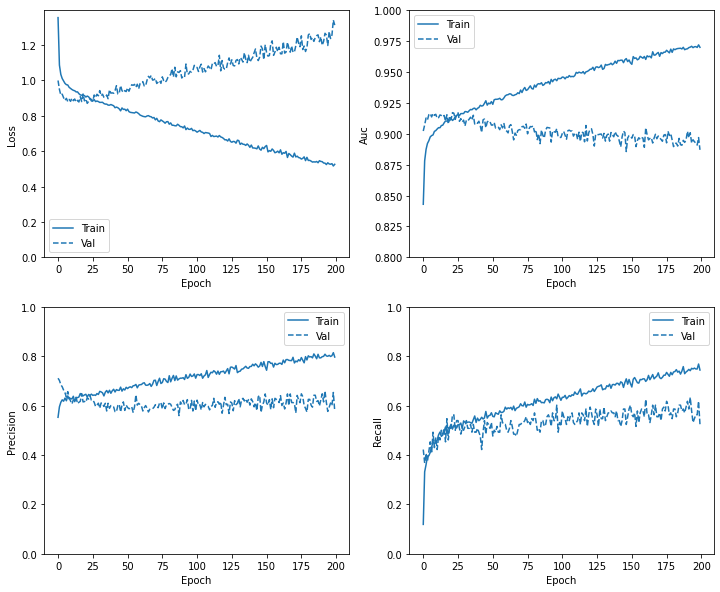

In [193]:
plot_metrics(history)

In [195]:
pred = model.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.2329 - tp: 177.0000 - fp: 110.0000 - tn: 1490.0000 - fn: 143.0000 - accuracy: 0.8682 - precision: 0.6167 - recall: 0.5531 - auc: 0.8896


In [206]:
metrics_= ['Loss', "True Positives", "False Positives", "True Negatives", "False Negatives", "Accuracy", "Precision", "Recall", "AUC"]
for p, m in zip(pred,metrics_):
  print(f'{m} : {p}')

Loss : 1.232856035232544
True Positives : 177.0
False Positives : 110.0
True Negatives : 1490.0
False Negatives : 143.0
Accuracy : 0.8682292103767395
Precision : 0.6167247295379639
Recall : 0.5531250238418579
AUC : 0.8895635008811951
